# ![alt text](logo.png)THE SPARKS FOUNDATION

# TASK 2: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually. 

## Author: Ravulakollu Narender <img src="profile.jpeg" alt="profile" width="200"/> 

### IMPORTING THE LIBRARIES:

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn import datasets

### IMPORTING THE DATASET

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### EXPLORING THE DATA & CHECKING FOR THE NULL VALUES

In [3]:
iris_df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


### DISPLAYING ALL THE COLUMNS AND THEIR DATA TYPES

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.shape

(150, 4)

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### CHECKING FOR ANY MISSING VALUE:

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### CHECKING FOR ANY DUPLICATE VALUES:¶

In [8]:
iris_df.duplicated().sum()

1

### FINDING THE DUPLICATE VALUES:

In [9]:
iris_df.drop_duplicates(inplace=True)

In [10]:
iris_df.shape

(149, 4)

### CHECKING FOR THE OUTLIERS:¶

/Users/narenderravulakollu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


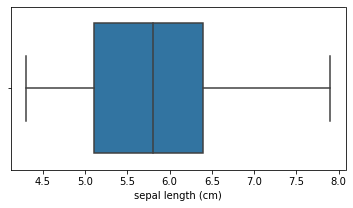

/Users/narenderravulakollu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


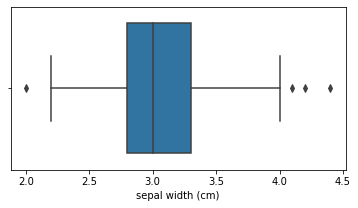

/Users/narenderravulakollu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


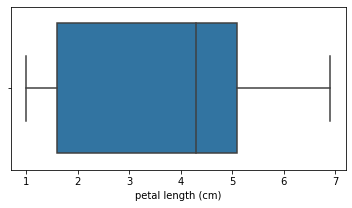

/Users/narenderravulakollu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


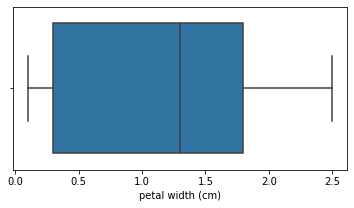

In [11]:
for i in iris_df.columns:
    if iris_df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris_df[i])
        plt.show()

### TREATING THE OUTLIERS:

/Users/narenderravulakollu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal width (cm)'>

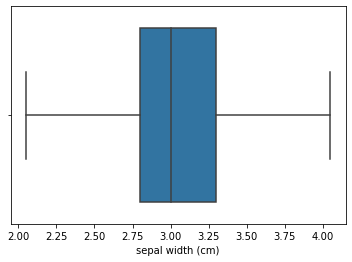

In [12]:
q1,q3=np.percentile(iris_df['sepal width (cm)'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
iris_df['sepal width (cm)'] = iris_df['sepal width (cm)'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
sns.boxplot(iris_df['sepal width (cm)'])

### NOW, CORRELATION MATRIX:

In [13]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.119293,0.873738,0.820620
sepal width (cm),-0.119293,1.000000,-0.425425,-0.362030
petal length (cm),0.873738,-0.425425,1.000000,0.962772
petal width (cm),0.820620,-0.362030,0.962772,1.000000


<AxesSubplot:>

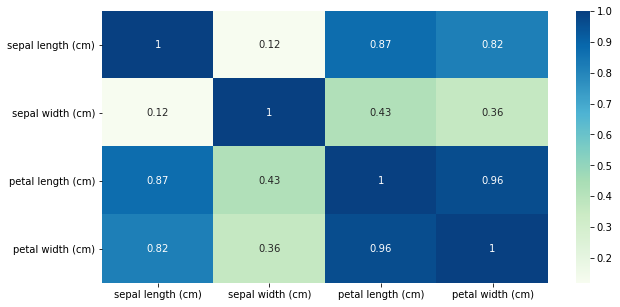

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris_df.corr()), cmap='GnBu', annot=True)

### FINDING THE OPTINUM NUMBER USING K-CLUSTERS

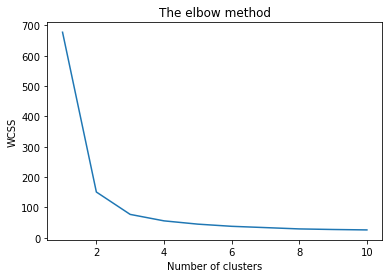

In [15]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### Here, from the above graph we can clearly see why it is called 'The Elbow Method'. The elbow occurs in the optimum clusters. This is when the within cluster sum of sqaures [WCSS] doesn't decrease significantly with every iteration. 

### CHOOSING THE NUMBER OF CLUSTERS AS '3' ALSO, APPLYING KMEANS TO THE DATA SET: 

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### VISUALIZING THE CLUSTERS [ON THE FIRST TWO COLUMNS]


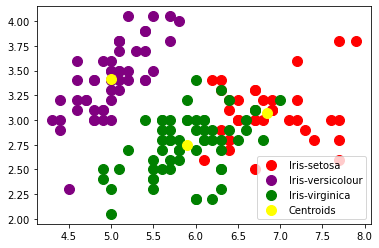

In [17]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

### NOW, PLOTTING THE CENTROIDS OF THE CLUSTERS:

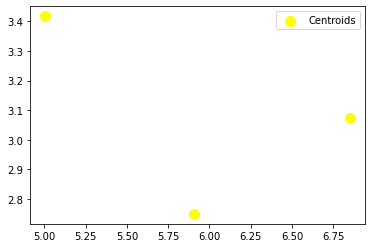

In [18]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'YELLOW', label = 'Centroids')

plt.legend()

In [19]:
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


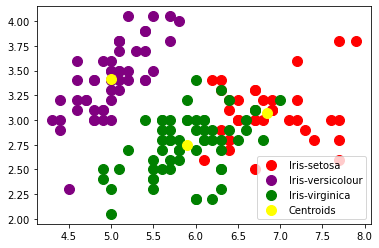

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Hence, we have successfully predicted the optimum number of clusters and represented it visually.